# Load Ardupilot .bin log files

## mainly for IMU, flight is stationary



In [1]:
%matplotlib inline

In [2]:
from ardupilot_log_reader.reader import Ardupilot
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
# import utm
# import math

from numpy.random import RandomState

# for date time management

import matplotlib.dates as mdates
import datetime as dt

In [3]:
HOME = os.getenv("HOME")
PATH2FILES = f'.'
PATH2FILES = f'{HOME}/Data/Drones/Flight_Logs/imu_log/'
# PATH2FILES = f'{HOME}/pCloudDrive/ITRI/Drones_UAV/FlightLogs/'
# LOGNAME = '2024-07-18 15-26-17.bin' # dynamic flight
LOGNAME = 'stationary.bin'
FULLNAME = f'{PATH2FILES}/{LOGNAME}'

In [4]:
# parser = Ardupilot.parse(FULLNAME,types=['XKF1','XKF2','GPS','VISP', 'VISV', 'NOT_A_MESSAGE']) # adding a type not present in the log don't raise an error
# parser = Ardupilot.parse(FULLNAME,types=['XKF1','XKF2','GPS','VISP','MAG','IMU','XKY0','MODE'])
parser = Ardupilot.parse(FULLNAME,types=['XKF1','XKF2','GPS','VISP','MAG','IMU','XKY0','MODE','ATT'])

In [8]:
# parse another log
LOGNAME = 'vins_250_loiter_test_visp.bin'
FULLNAME = f'{PATH2FILES}/{LOGNAME}'
parser2 = Ardupilot.parse(FULLNAME,types=['XKF1','XKF2','GPS','VISP','VISV','MAG','IMU','XKY0','MODE','ATT'])

In [6]:
mydf = parser.dfs['PARM']

In [9]:
mydf2 = parser2.dfs['PARM']

In [10]:
print(mydf[mydf['Name'].str.contains('IMU')])

NameError: name 'mydf' is not defined

In [8]:
# mydf_visp = parser.dfs['VISP'] # no VISP this time
mydf_mag = parser.dfs['MAG']
mydf_imu = parser.dfs['IMU']

In [21]:
mydf2_imu = parser2.dfs['IMU']
mydf2_pos = parser2.dfs['VISP']

### IMU log analysis

#### Static situation, drone left on the table, not moving, no motor on.

In [19]:
accx,accy,accz = mydf_imu['AccX'].to_numpy(), mydf_imu['AccY'].to_numpy(), mydf_imu['AccZ'].to_numpy()
# seems that accx contains data from 2 accnetometer, 
# we take one every other elements
# accx1,accy1,accz1 = accx[0::2],accy[0::2],accz[0::2]
accx1,accy1,accz1 = accx[0::2].copy(),accy[0::2].copy(),accz[0::2].copy()
# accx2,accy2,accz2 = accx[1::2],accy[1::2],accz[1::2] 


In [20]:
len(accx1)
# get average gravity
gravity = np.mean(accz1)
print(gravity)
# remove gracity from acc z
accz1 = accz1 - gravity

-9.802532682830003


In [21]:
# get the average acceleration
accm1 = np.sqrt(accx1*accx1+accy1*accy1+accz1*accz1)

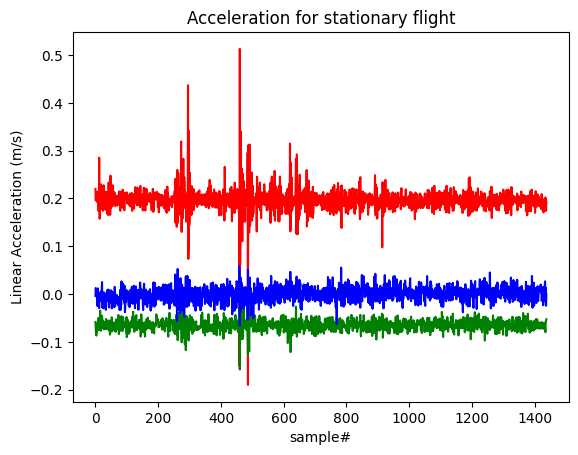

In [44]:
fig,ax = plt.subplots(1)
ax.plot(accx1,'r')
ax.plot(accy1,'g')
ax.plot(accz1,'b')
# ax.plot(accm1,'k.')
ax.set_title('Acceleration, idle on desk')
ax.set_xlabel('sample#')
ax.set_ylabel('Linear Acceleration (m/s)')
# plt.savefig("acc_from_log_idleondesk.png", format='png')
# plt.savefig("magx_from_log_with_train_zoomin.png", format='png')
plt.show()

In [36]:
dt = 1/25

In [51]:
# now check the velocity and position
time = np.arange(0,len(accm1))*dt
velmag = np.cumsum(accm1)*dt
velmag_x = np.cumsum(accx1)*dt
velmag_y = np.cumsum(accy1)*dt
velmag_z = np.cumsum(accz1)*dt
posmag = np.cumsum(velmag)*dt
posmag_x = np.cumsum(velmag_x)*dt
posmag_y = np.cumsum(velmag_y)*dt
posmag_z = np.cumsum(velmag_z)*dt

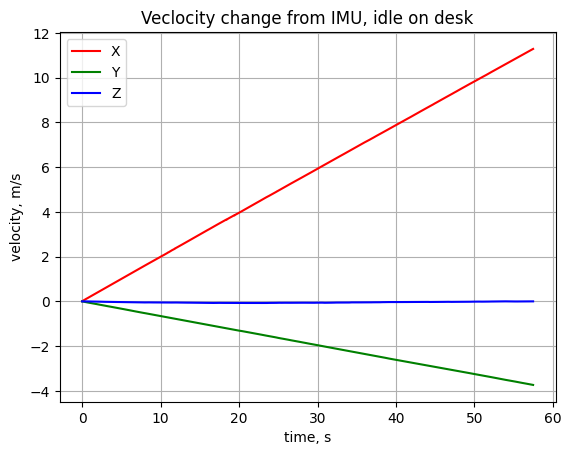

In [70]:
fig,ax = plt.subplots(1)
ax.plot(time,velmag_x,'r',label="X")
ax.plot(time,velmag_y,'g',label="Y")
ax.plot(time,velmag_z,'b',label="Z")
ax.set_title('Veclocity change from IMU, idle on desk')
ax.set_ylabel('velocity, m/s')
ax.set_xlabel('time, s')
ax.grid()
ax.legend()

# plt.savefig("velocity_idleOndesk.png", format='png')

plt.show()


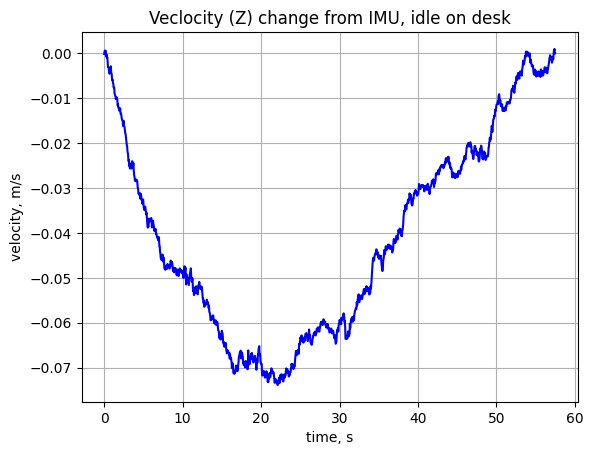

In [71]:
fig,ax = plt.subplots(1)
# ax.plot(time,velmag_x,'r')
# ax.plot(time,velmag_y,'g')
ax.plot(time,velmag_z,'b')
ax.set_title('Veclocity (Z) change from IMU, idle on desk')
ax.set_ylabel('velocity, m/s')
ax.set_xlabel('time, s')
ax.grid()
# plt.savefig("velocity_z_only_idle.png", format='png')

plt.show()


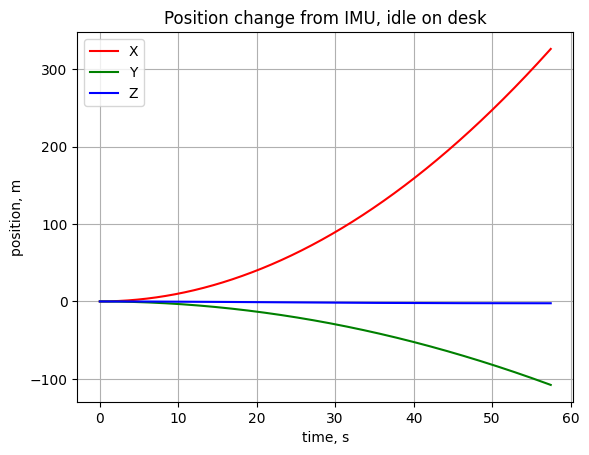

In [72]:
fig,ax = plt.subplots(1)
ax.plot(time,posmag_x,'r',label="X")
ax.plot(time,posmag_y,'g',label="Y")
ax.plot(time,posmag_z,'b',label="Z")
ax.set_title('Position change from IMU, idle on desk')
ax.set_ylabel('position, m')
ax.set_xlabel('time, s')
ax.legend()
ax.grid()

plt.savefig("position_from_log_stationary.png", format='png')

plt.show()


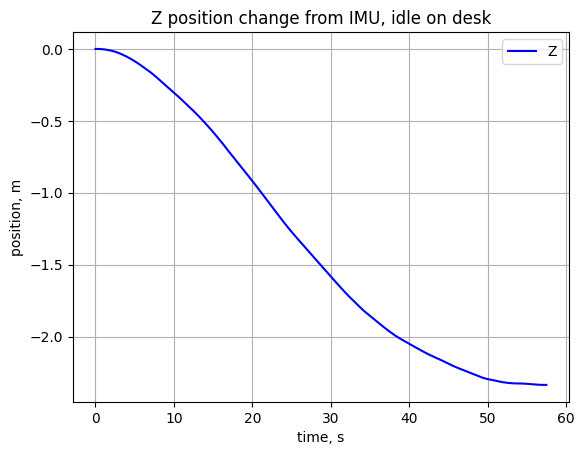

In [73]:
fig,ax = plt.subplots(1)
# ax.plot(time,posmag_x,'r',label="X")
# ax.plot(time,posmag_y,'g',label="Y")
ax.plot(time,posmag_z,'b',label="Z")
ax.set_title('Z position change from IMU, idle on desk')
ax.set_ylabel('position, m')
ax.set_xlabel('time, s')
ax.legend()
ax.grid()

# plt.savefig("position_Z_log_idle.png", format='png')

plt.show()


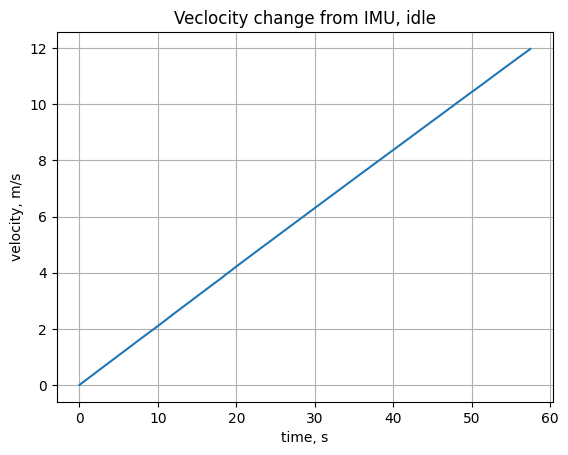

In [74]:
fig,ax = plt.subplots(1)
ax.plot(time,velmag)
ax.set_title('Veclocity change from IMU, idle')
ax.set_ylabel('velocity, m/s')
ax.set_xlabel('time, s')
ax.grid()
plt.show()


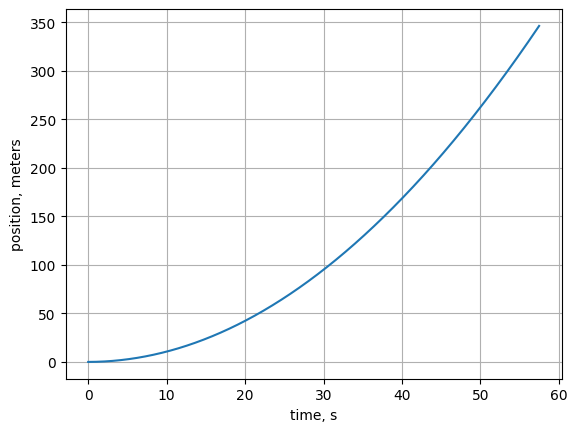

In [45]:
fig,ax = plt.subplots(1)
ax.plot(time,posmag)
ax.set_ylabel('position, meters')
ax.set_xlabel('time, s')
ax.grid()

plt.show()

### IMU log analysis

#### Loiter mode, with VINS

In [20]:
print(f"VISV:\n {parser2.dfs['VISV'][0:2]} ")
print(f"VISP:\n {parser2.dfs['VISP'][0:2]} ")

VISV:
     timestamp     TimeUS           RTimeUS  CTimeMS        VX        VY  \
0  249.429557  249429557  1723449429571321   249426 -0.003095 -0.001000   
1  249.479769  249479769  1723449429621041   249476 -0.003091 -0.000867   

         VZ  VErr  Rst  Ign  Q  
0  0.000693   0.3    0    0  0  
1  0.000614   0.3    0    0  0   
VISP:
     timestamp     TimeUS           RTimeUS  CTimeMS        PX        PY  \
0  249.429454  249429454  1723449429571296   249426  0.146989 -0.036976   
1  249.479580  249479580  1723449429621017   249476  0.146906 -0.037002   

         PZ         R         P         Y  PErr  AErr  Rst  Ign  Q  
0 -0.186058 -1.356660  1.355362  0.454323   0.5   0.2    0    0  0  
1 -0.186048 -1.354806  1.357414  0.455026   0.5   0.2    0    0  0   


### Load the data (IMU, VISP)

In [23]:
accx,accy,accz = mydf2_imu['AccX'].to_numpy(), mydf2_imu['AccY'].to_numpy(), mydf2_imu['AccZ'].to_numpy()
posx,posy,posz = mydf2_pos['PX'].to_numpy(), mydf2_pos['PY'].to_numpy(), mydf2_pos['PZ'].to_numpy()
# seems that accx contains data from 2 accnetometer, 
# we take one every other elements
# accx1,accy1,accz1 = accx[0::2],accy[0::2],accz[0::2]
# for further processing on the raw data
accx1,accy1,accz1 = accx[0::2].copy(),accy[0::2].copy(),accz[0::2].copy()
# accx2,accy2,accz2 = accx[1::2],accy[1::2],accz[1::2] 


In [55]:
print(f'nb of samples: {len(accx1)},{len(posx)}')
# seems that IMU log lasted longer than VISP, so we fix the max nb of fsampe of comparison to that of VISP
maxs = len(posx)
# get average gravity
gravity = np.mean(accz1)
print(gravity)
# remove gracity from acc z
accz1 = accz1 - gravity

nb of samples: 3788,2801
1.99300859753196e-18


In [91]:
# get the magnitude of the acceleration
accm1 = np.sqrt(accx1*accx1+accy1*accy1+accz1*accz1)
# distance travelled as reported by VIO
posm_vio = np.sqrt(posx*posx+posy*posy+posz*posz)

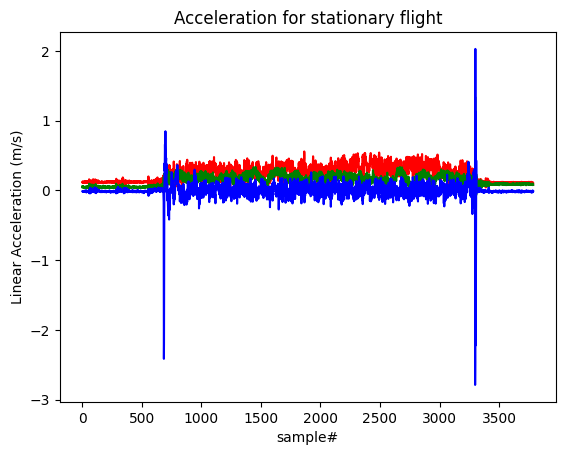

In [44]:
fig,ax = plt.subplots(1)
ax.plot(accx1,'r')
ax.plot(accy1,'g')
ax.plot(accz1,'b')
# ax.plot(accm1,'k.')
ax.set_title('Acceleration for stationary flight')
ax.set_xlabel('sample#')
ax.set_ylabel('Linear Acceleration (m/s)')
# plt.savefig("acc_from_log_stationary.png", format='png')
# plt.savefig("magx_from_log_with_train_zoomin.png", format='png')
plt.show()

In [78]:
dt = 1/25
samprange = np.arange(0,maxs)
# samprange = np.arange(500,maxs)

In [79]:
# now check the velocity and position
time = np.arange(0,len(accm1[samprange]))*dt
velmag = np.cumsum(accm1[samprange])*dt
velmag_x = np.cumsum(accx1[samprange])*dt
velmag_y = np.cumsum(accy1[samprange])*dt
velmag_z = np.cumsum(accz1[samprange])*dt

posmag = np.cumsum(velmag)*dt
posmag_x = np.cumsum(velmag_x)*dt
posmag_y = np.cumsum(velmag_y)*dt
posmag_z = np.cumsum(velmag_z)*dt

# from VISP
# pos_visp_x,pos_visp_y,pos_visp_z = posx[0::2].copy(),posy[0::2].copy(), posz[0::2].copy()
pos_visp_x,pos_visp_y,pos_visp_z = posx[samprange],posy[samprange], posz[samprange]

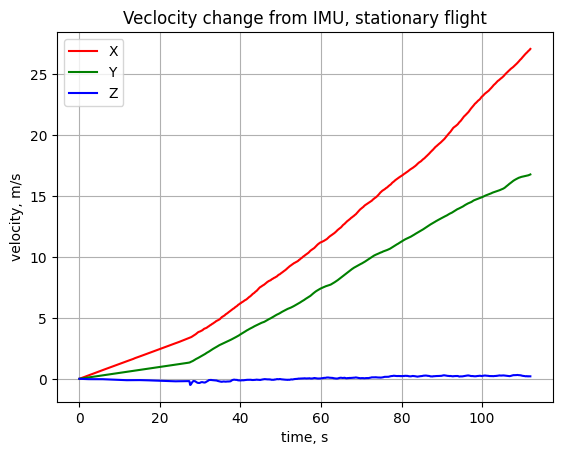

In [80]:
fig,ax = plt.subplots(1)
ax.plot(time,velmag_x,'r',label="X")
ax.plot(time,velmag_y,'g',label="Y")
ax.plot(time,velmag_z,'b',label="Z")
ax.set_title('Veclocity change from IMU, stationary flight')
ax.set_ylabel('velocity, m/s')
ax.set_xlabel('time, s')
ax.grid()
ax.legend()

plt.savefig("velocity_from_log_stationary.png", format='png')

plt.show()


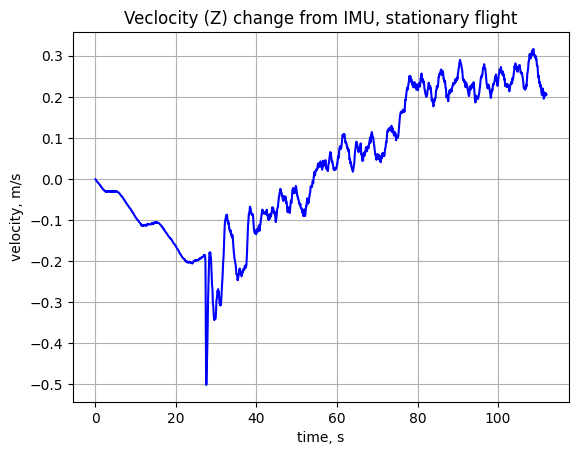

In [81]:
fig,ax = plt.subplots(1)
# ax.plot(time,velmag_x,'r')
# ax.plot(time,velmag_y,'g')
ax.plot(time,velmag_z,'b')
ax.set_title('Veclocity (Z) change from IMU, stationary flight')
ax.set_ylabel('velocity, m/s')
ax.set_xlabel('time, s')
ax.grid()
plt.savefig("velocity_z_only_log_stationary.png", format='png')

plt.show()


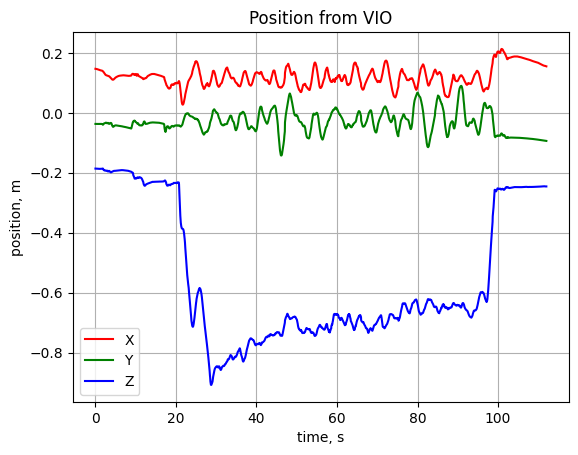

In [82]:
fig,ax = plt.subplots(1)
ax.plot(time,pos_visp_x,'r',label="X")
ax.plot(time,pos_visp_y,'g',label="Y")
ax.plot(time,pos_visp_z,'b',label="Z")
# ax.plot(posx,'r',label="X")
# ax.plot(posy,'g',label="Y")
# ax.plot(posz,'b',label="Z")
ax.set_title('Position from VIO')
ax.set_ylabel('position, m')
ax.set_xlabel('time, s')
ax.legend()
ax.grid()

# plt.savefig("position_from_log_stationary.png", format='png')

plt.show()


#### offset the pos from VIO to the origin

That is for better comparison with position from IMU.

In [83]:
pos_visp_x = pos_visp_x - pos_visp_x[0]
pos_visp_y = pos_visp_y - pos_visp_y[0]
pos_visp_z = pos_visp_z - pos_visp_z[0]

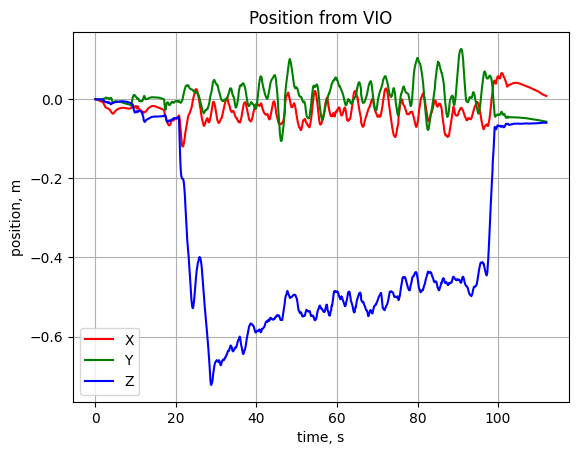

In [84]:
fig,ax = plt.subplots(1)
ax.plot(time,pos_visp_x,'r',label="X")
ax.plot(time,pos_visp_y,'g',label="Y")
ax.plot(time,pos_visp_z,'b',label="Z")
# ax.plot(posx,'r',label="X")
# ax.plot(posy,'g',label="Y")
# ax.plot(posz,'b',label="Z")
ax.set_title('Position from VIO')
ax.set_ylabel('position, m')
ax.set_xlabel('time, s')
ax.legend()
ax.grid()

# plt.savefig("position_from_log_stationary.png", format='png')

plt.show()


#### compare VISP (from VIO) and position from IMU

In [85]:
diff_posx = pos_visp_x - posmag_x
diff_posy = pos_visp_y - posmag_y
diff_posz = pos_visp_z - posmag_z

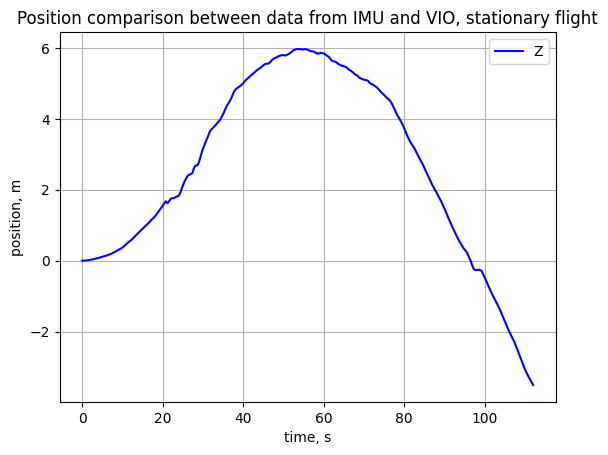

In [87]:
# observe_range = np.arange(100) # 100 samples ~4s
observe_range = np.arange(maxs) # all samples
fig,ax = plt.subplots(1)

ax.plot(time[observe_range],diff_posz[observe_range],'b',label="Z")
ax.set_title('Position comparison between data from IMU and VIO, stationary flight')
ax.set_ylabel('position, m')
ax.set_xlabel('time, s')
ax.legend()
ax.grid()

# plt.savefig("position_from_log_stationary.png", format='png')

plt.show()


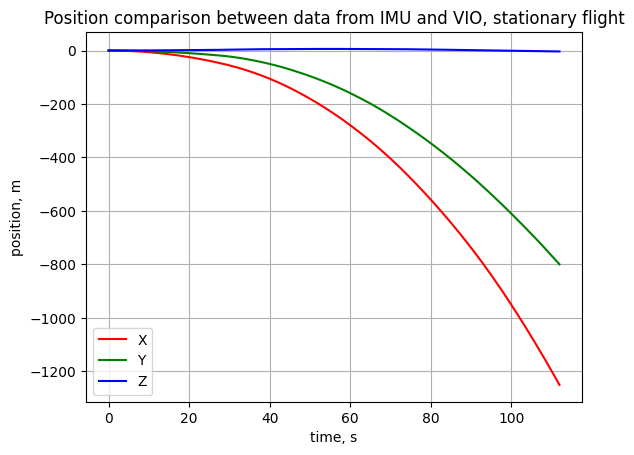

In [88]:
fig,ax = plt.subplots(1)
ax.plot(time,diff_posx,'r',label="X")
ax.plot(time,diff_posy,'g',label="Y")
ax.plot(time,diff_posz,'b',label="Z")
ax.set_title('Position comparison between data from IMU and VIO, stationary flight')
ax.set_ylabel('position, m')
ax.set_xlabel('time, s')
ax.legend()
ax.grid()

# plt.savefig("position_from_log_stationary.png", format='png')

plt.show()


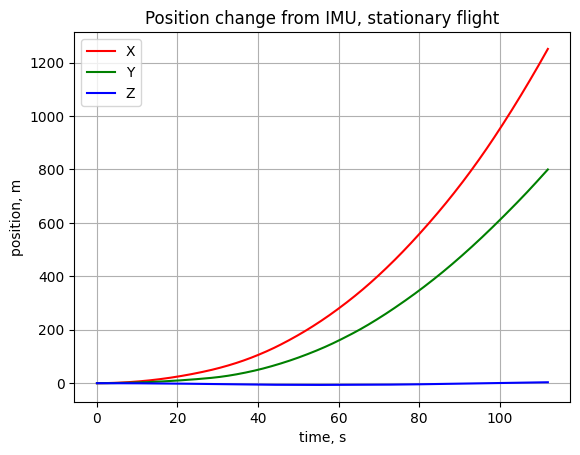

In [89]:
fig,ax = plt.subplots(1)
ax.plot(time,posmag_x,'r',label="X")
ax.plot(time,posmag_y,'g',label="Y")
ax.plot(time,posmag_z,'b',label="Z")
ax.set_title('Position change from IMU, stationary flight')
ax.set_ylabel('position, m')
ax.set_xlabel('time, s')
ax.legend()
ax.grid()

plt.savefig("position_from_log_stationary.png", format='png')

plt.show()


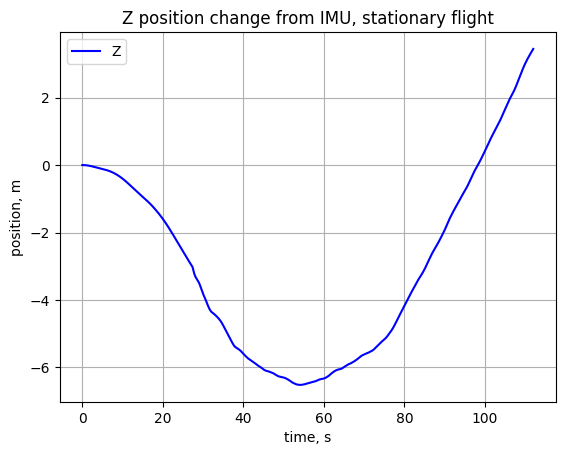

In [90]:
fig,ax = plt.subplots(1)
# ax.plot(time,posmag_x,'r',label="X")
# ax.plot(time,posmag_y,'g',label="Y")
ax.plot(time,posmag_z,'b',label="Z")
ax.set_title('Z position change from IMU, stationary flight')
ax.set_ylabel('position, m')
ax.set_xlabel('time, s')
ax.legend()
ax.grid()

plt.savefig("position_Z_log_stationary.png", format='png')

plt.show()


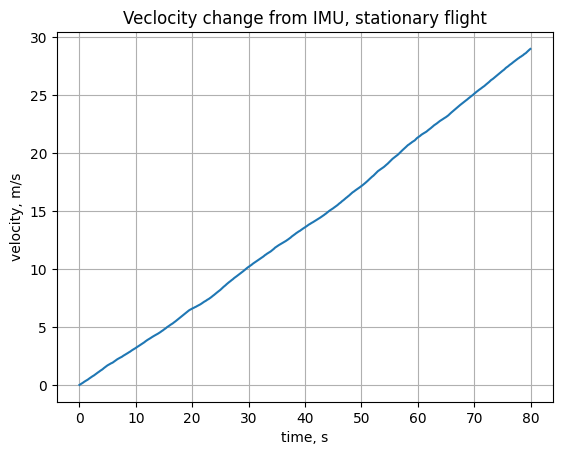

In [86]:
fig,ax = plt.subplots(1)
ax.plot(time,velmag)
ax.set_title('Veclocity change from IMU, stationary flight')
ax.set_ylabel('velocity, m/s')
ax.set_xlabel('time, s')
ax.grid()
plt.show()


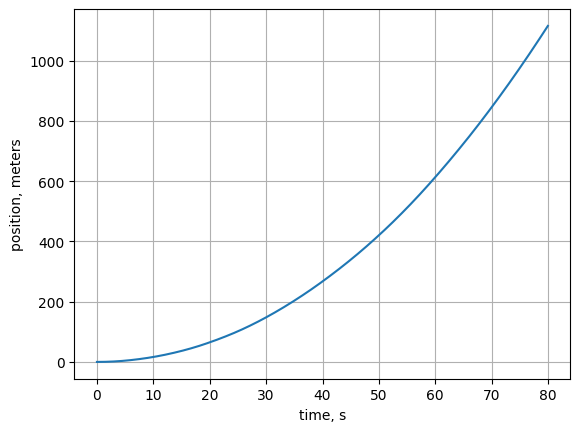

In [87]:
fig,ax = plt.subplots(1)
ax.plot(time,posmag)
ax.set_ylabel('position, meters')
ax.set_xlabel('time, s')
ax.grid()

plt.show()

In [92]:
from mpl_toolkits.mplot3d import Axes3D

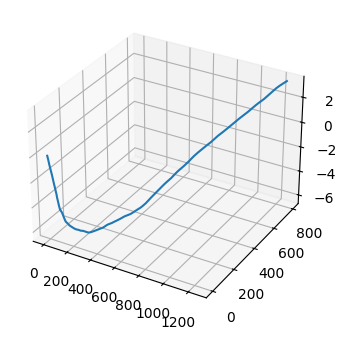

In [95]:
fig = plt.figure(figsize=(4,4))

ax = fig.add_subplot(111, projection='3d')
ax.plot(posmag_x,posmag_y,posmag_z)

plt.show()

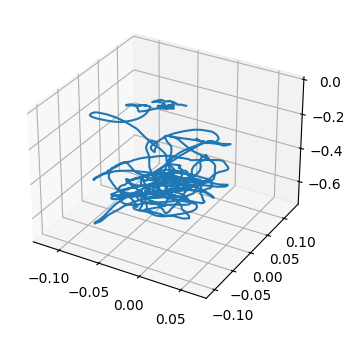

In [96]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')
ax.plot(pos_visp_x,pos_visp_y,pos_visp_z)
plt.show()

https://likegeeks.com/3d-plotting-in-python/

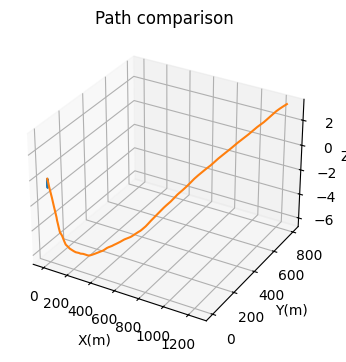

In [104]:

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')
ax.plot(pos_visp_x,pos_visp_y,pos_visp_z)
ax.plot(posmag_x,posmag_y,posmag_z)
ax.set_title("Path comparison")
ax.set_xlabel("X(m)")
ax.set_ylabel("Y(m)")
ax.set_zlabel("Z(m)")
# ax.set_xlim(0,10)

# ax.set_ylim(0,16)

# ax.set_zlim(-1,1)
plt.show()